In [ ]:
#como primer paso, le decimos a la IA que instale las siguientes librerias necesarias para el proyecto de forecasting de ventas:
#una vez descargadas las librerias, le decimos a la IA que las importe para poder utilizarlas en el proyecto de forecasting de ventas:
#luego importamos todas las librerias necesarias para el proyecto de forecasting de ventas, que son las siguientes:
#importamos la libreria pandas, que es una herramienta de software de código abierto para la manipulación y análisis de datos en Python.
#importamos la libreria numpy, que es una biblioteca de Python para el cálculo numérico y la manipulación de matrices.
#importamos matplotlib.pyplot, que es una biblioteca de Python para la creación de gráficos y visualizaciones.
#importamos la libreria seaborn, que es una biblioteca de visualización de datos basada en matplotlib que proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos.
#importamos la libreria sklearn, que es una biblioteca de aprendizaje automático en Python que proporciona herramientas para la construcción y evaluación de modelos de machine learning.
#importamos la libreria streamlit, que es una biblioteca de Python para la creación de aplicaciones web interactivas y visualizaciones de datos de manera rápida y sencilla.    
#importamos holidays, que es una biblioteca de Python para trabajar con días festivos y vacaciones en diferentes países y regiones. 

In [1]:
# Importación de librerías principales para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays


In [ ]:
'''Le decimos a la Ia que queremos cargar el dataframe ventas desde un archivo csv ubicado en la carpeta data, y que lo guarde en  una variable llamada ventas_df.'''

In [9]:
# Cargar los archivos CSV desde la carpeta data/raw/entrenamiento
ventas_df = pd.read_csv('../data/raw/entrenamiento/ventas.csv')
competencia_df = pd.read_csv('../data/raw/entrenamiento/competencia.csv')

# Mostrar las primeras filas para verificar
print('Ventas:')
print(ventas_df.head())
print('\nCompetencia:')
print(competencia_df.head())

Ventas:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    1

In [10]:
ventas_df.head()#esto me sirve para mostrar los primeros registros del dataframe ventas_df y verificar que se ha cargado correctamente.
#ventas_df.columns#esto me sirve para ver el nombre de todas las variables del data frame ventas _df

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


In [11]:
competencia_df.head()#esto sirve para ver los datos de la competencia y verificar que se ha cargado correctamente.


,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [12]:
#le pedimos a la IA que realice una validación de calidad de datos para el dataframe ventas_df, y que nos muestre los resultados de dicha validación. La validación de calidad de datos es un proceso que se utiliza para evaluar la calidad de los datos en un conjunto de datos, y puede incluir la verificación de la integridad, la precisión, la consistencia y la validez de los datos. Al realizar esta validación, podemos identificar posibles problemas con los datos y tomar medidas para corregirlos antes de utilizarlos para el análisis o la construcción de modelos.

In [13]:
# ==============================
# INFORME DE CALIDAD DE DATOS DE ventas_df
# ==============================

print('==============================')
print('INFORME DE CALIDAD DE DATOS')
print('==============================\n')

# Tipos de datos
print('## Tipos de datos:')
print(ventas_df.dtypes)
print('\n')

# Nulos
print('## Valores nulos por columna:')
print(ventas_df.isnull().sum())
print('\n')

# Duplicados
duplicados = ventas_df.duplicated().sum()
print(f'## Filas duplicadas: {duplicados}\n')

# Estadísticas descriptivas
print('## Estadísticas descriptivas:')
print(ventas_df.describe(include="all"))
print('\n')

# Valores únicos por columna
print('## Valores únicos por columna:')
for col in ventas_df.columns:
    print(f'{col}: {ventas_df[col].nunique()}')
print('\n')

# Ejemplo de valores únicos para variables categóricas
cat_cols = ventas_df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f'Valores únicos en la columna {col}:')
    print(ventas_df[col].unique())
    print('\n')

# Ejemplo de valores atípicos en variables numéricas
import numpy as np
num_cols = ventas_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    q1 = ventas_df[col].quantile(0.25)
    q3 = ventas_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ventas_df[(ventas_df[col] < (q1 - 1.5 * iqr)) | (ventas_df[col] > (q3 + 1.5 * iqr))]
    print(f'Valores atípicos en la columna {col}: {outliers.shape[0]}')
    print('\n')

print('==============================')
print('FIN DEL INFORME DE CALIDAD')
print('==============================')

INFORME DE CALIDAD DE DATOS

## Tipos de datos:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object


## Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64


## Filas duplicadas: 0

## Estadísticas descriptivas:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         148       

In [14]:
#con los datos del informe de calidad de ventas_df, le preguntamos a la IA que nos diga si hay algun problema con los datos de ventas_df, y que nos diga que medidas podemos tomar para corregir dichos problemas antes de utilizarlos para el análisis o la construcción de modelos.

In [ ]:
#ahora le decimos a la IA que realice un informe de calidad para competencia_df, y que nos muestre los resultados de dicha validación. La validación de calidad de datos es un proceso que se utiliza para evaluar la calidad de los datos en un conjunto de datos, y puede incluir la verificación de la integridad, la precisión, la consistencia y la validez de los datos. Al realizar esta validación, podemos identificar posibles problemas con los datos y tomar medidas para corregirlos antes de utilizarlos para el análisis o la construcción de modelos.
#luego con el codigo ya creado, le decimos a la IA que nos diga si hay algun problema con los datos de competencia_df, y que nos diga que medidas podemos tomar para corregir dichos problemas antes de utilizarlos para el análisis o la construcción de modelos.


In [15]:
# ==============================
# INFORME DE CALIDAD DE DATOS DE competencia_df
# ==============================

print('==============================')
print('INFORME DE CALIDAD DE DATOS (competencia_df)')
print('==============================\n')

# Tipos de datos
print('## Tipos de datos:')
print(competencia_df.dtypes)
print('\n')

# Nulos
print('## Valores nulos por columna:')
print(competencia_df.isnull().sum())
print('\n')

# Duplicados
duplicados = competencia_df.duplicated().sum()
print(f'## Filas duplicadas: {duplicados}\n')

# Estadísticas descriptivas
print('## Estadísticas descriptivas:')
print(competencia_df.describe(include="all"))
print('\n')

# Valores únicos por columna
print('## Valores únicos por columna:')
for col in competencia_df.columns:
    print(f'{col}: {competencia_df[col].nunique()}')
print('\n')

# Ejemplo de valores únicos para variables categóricas
cat_cols = competencia_df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f'Valores únicos en la columna {col}:')
    print(competencia_df[col].unique())
    print('\n')

# Ejemplo de valores atípicos en variables numéricas
import numpy as np
num_cols = competencia_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    q1 = competencia_df[col].quantile(0.25)
    q3 = competencia_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = competencia_df[(competencia_df[col] < (q1 - 1.5 * iqr)) | (competencia_df[col] > (q3 + 1.5 * iqr))]
    print(f'Valores atípicos en la columna {col}: {outliers.shape[0]}')
    print('\n')

print('==============================')
print('FIN DEL INFORME DE CALIDAD (competencia_df)')
print('==============================')

INFORME DE CALIDAD DE DATOS (competencia_df)

## Tipos de datos:
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object


## Valores nulos por columna:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64


## Filas duplicadas: 0

## Estadísticas descriptivas:
             fecha producto_id       Amazon    Decathlon  Deporvillage
count         3552        3552  3552.000000  3552.000000   3552.000000
unique         148          24          NaN          NaN           NaN
top     2021-10-25    PROD_001          NaN          NaN           NaN
freq            24         148          NaN          NaN           NaN
mean           NaN         NaN   118.623407   111.412182    118.894628
std            NaN         NaN   156.095628   148.508132    160.216448
min            NaN         NaN    16.850000    15.450000     16.770000
25%            NaN         NaN    47.11750

In [16]:
# Conversión de la columna 'fecha' a tipo datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

# Verificamos el cambio de tipo
def print_fecha_dtype(df, nombre):
    print(f"Tipo de 'fecha' en {nombre}: {df['fecha'].dtype}")

print_fecha_dtype(ventas_df, 'ventas_df')
print_fecha_dtype(competencia_df, 'competencia_df')

Tipo de 'fecha' en ventas_df: datetime64[ns]
Tipo de 'fecha' en competencia_df: datetime64[ns]


In [17]:
ventas_df.info()#esto me sirve para mostrar la información general del dataframe ventas_df, incluyendo el número de filas, columnas, tipos de datos y cantidad de valores no nulos en cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [18]:
competencia_df.info()#esto me sirve para mostrar la información general del dataframe competencia_df, incluyendo el número de filas, columnas, tipos de datos y cantidad de valores no nulos en cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [ ]:
#una vez tenemos los valores de ventas y competencia, le decimos a la IA que integre ambos dataframes en un nuevo dataframe llamado DF, utilizando las columnas 'fecha' y 'producto_id' como claves para la integración. Luego, le pedimos que nos muestre las primeras filas del nuevo dataframe DF para verificar que la integración se ha realizado correctamente.
#esto lo haremos usando un merge de pandas, que es una función que permite combinar dos dataframes en función de una o más columnas clave. En este caso, utilizaremos las columnas 'fecha' y 'producto_id' como claves para la integración, lo que nos permitirá combinar los datos de ventas y competencia en un solo dataframe llamado DF. Luego, mostraremos las primeras filas de DF para verificar que la integración se ha realizado correctamente.
#y un inner join, que nos permitirá conservar solo las filas que tengan coincidencias en ambas tablas, es decir, solo las fechas y productos que estén presentes tanto en ventas_df como en competencia_df. Esto nos asegurará que el dataframe resultante DF contenga únicamente los registros para los cuales tenemos información de ventas y competencia, lo que es fundamental para el análisis y la construcción de modelos de forecasting de ventas.

In [22]:
# Integración de ventas_df y competencia_df en un nuevo dataframe DF usando 'fecha' y 'producto_id' como claves
df = pd.merge(
    ventas_df, 
    competencia_df, 
    on=['fecha', 'producto_id'], 
    how='inner')

# Mostramos las primeras filas para verificar la integración
print('Primeras filas del dataframe integrado df:')
print(df.head())

Primeras filas del dataframe integrado df:
       fecha producto_id                            nombre categoria  \
0 2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1 2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2 2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3 2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4 2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  Amazon  Decathlon  Deporvillage  
0        118.36    710.16   82.96     111.

In [20]:
df.head()#esto me sirve para mostrar las primeras filas del dataframe df, que es el resultado del inner join de ventas_df y competencia_df, y verificar que la integración se ha realizado correctamente.

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


In [ ]:
#le pediremos a la IA que haga un analisis exploratorio completo de df que incluya un grafico de la serie de tiempo de ventas, un grafico de la competencia, un grafico de correlacion entre las variables, y un analisis de los valores atipicos en las variables numericas.
#el formato de usar notebooks es ideal para este tipo de análisis exploratorio, ya que nos permite combinar código, visualizaciones y texto explicativo en un solo documento. Esto facilita la comprensión de los resultados y la comunicación de los hallazgos. Además, el uso de notebooks nos permite iterar rápidamente sobre el análisis, ajustando el código y las visualizaciones según sea necesario para profundizar en los insights obtenidos a partir del dataframe df.haz

## Análisis exploratorio de df

A continuación se realiza un análisis exploratorio completo de la variable `df` con diferentes visualizaciones usando seaborn.

In [23]:
# 🤖 Importar librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

sns.set(style='whitegrid', palette='Set2')

# Asegurarse de que la columna fecha es datetime
if not np.issubdtype(df['fecha'].dtype, np.datetime64):
    df['fecha'] = pd.to_datetime(df['fecha'])

### 1. Gráficos de líneas temporales de unidades vendidas por año

Se muestra un gráfico separado para cada año con la suma de unidades vendidas por día, marcando los días de Black Friday.

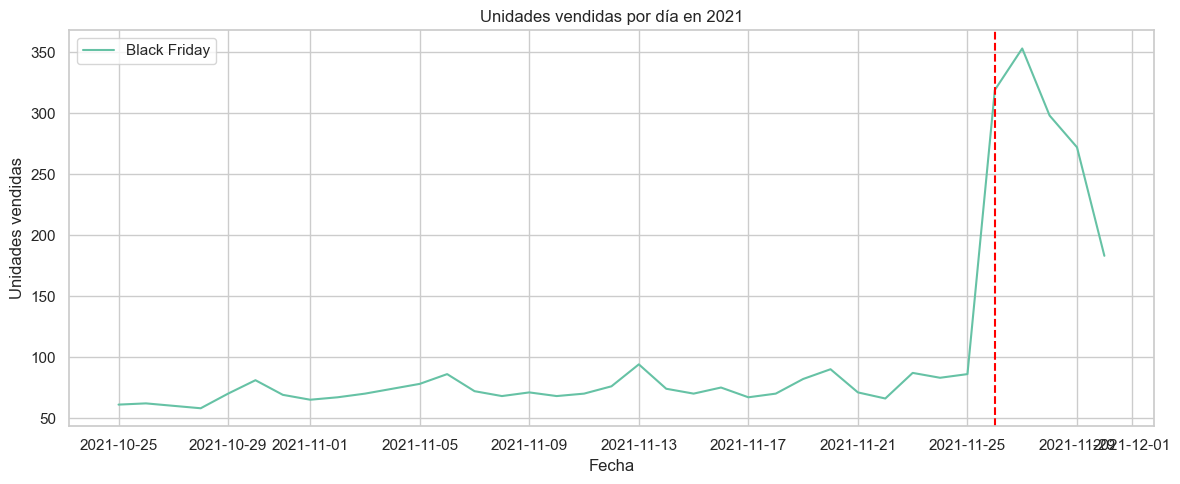

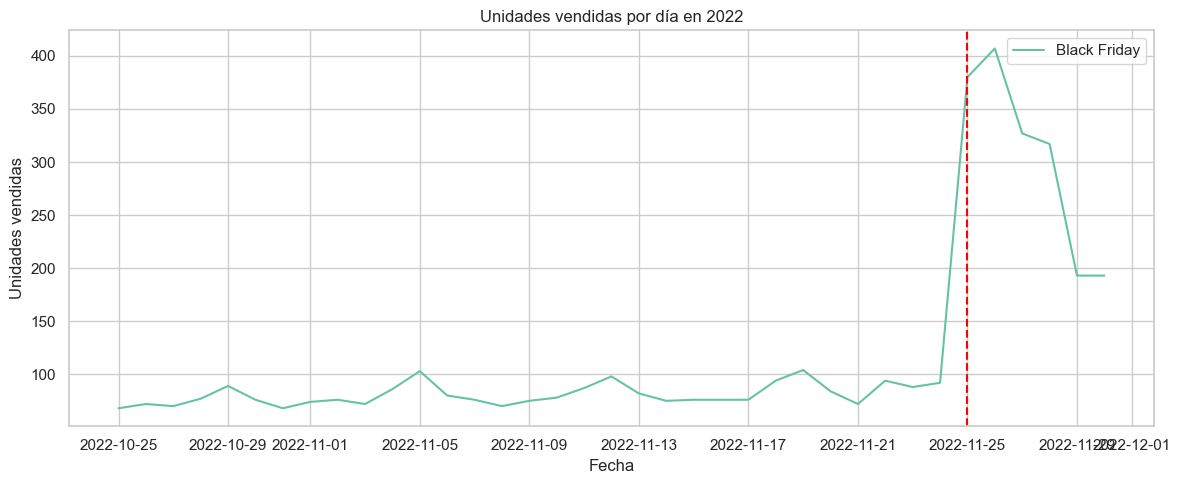

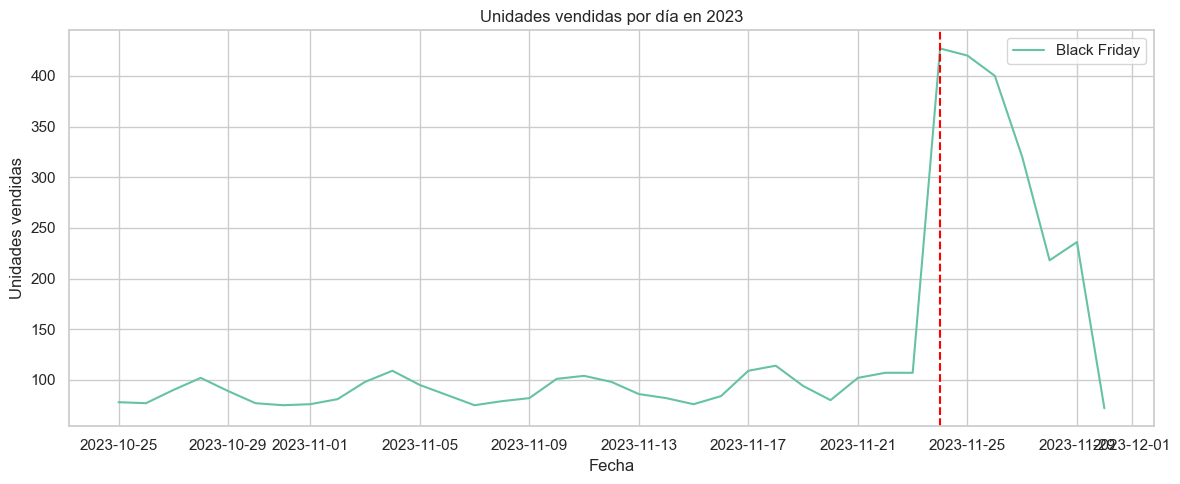

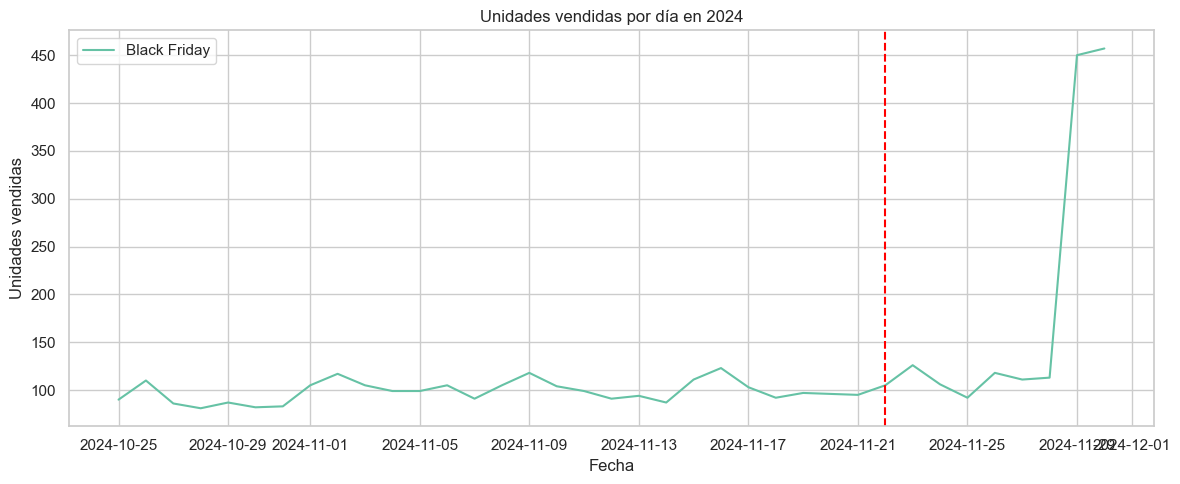

In [24]:
# 🤖 Gráficos de líneas temporales de unidades vendidas por año y Black Friday
# Añadir columna de año
df['año'] = df['fecha'].dt.year

# Calcular días de Black Friday para cada año presente en df
def get_black_friday(year):
    nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='D')
    fridays = nov[nov.weekday == 4]
    return fridays[3] if len(fridays) >= 4 else None
black_fridays = {year: get_black_friday(year) for year in df['año'].unique()}

for year in sorted(df['año'].unique()):
    df_year = df[df['año'] == year]
    daily = df_year.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    plt.figure(figsize=(12,5))
    sns.lineplot(data=daily, x='fecha', y='unidades_vendidas')
    # Marcar Black Friday
    bf = black_fridays.get(year)
    if bf is not None:
        plt.axvline(bf, color='red', linestyle='--', label='Black Friday')
    plt.title(f'Unidades vendidas por día en {year}')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    if bf is not None:
        plt.legend(['Black Friday'])
    plt.tight_layout()
    plt.show()

### 2. Suma de unidades vendidas por día de la semana

Gráfico de barras con la suma de unidades vendidas para cada día de la semana.

C:\Users\paula\AppData\Local\Temp\ipykernel_10960\262693765.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='nombre_dia', y='unidades_vendidas', estimator=sum, ci=None, order=nombres_dias)


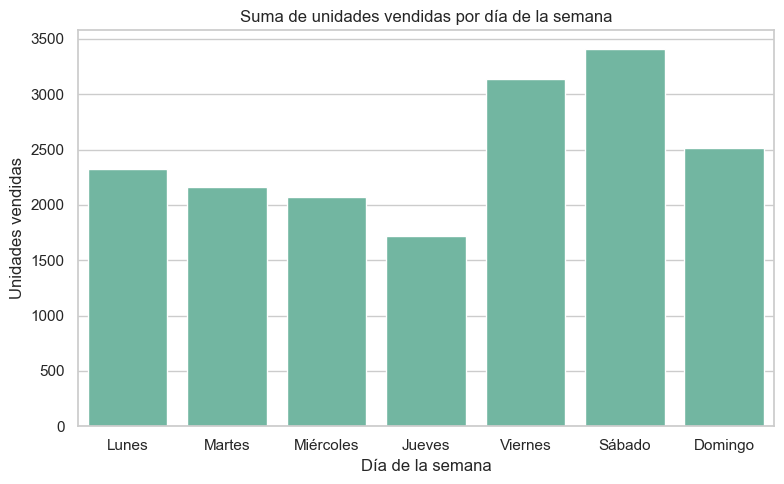

In [25]:
# 🤖 Suma de unidades vendidas por día de la semana
df['dia_semana'] = df['fecha'].dt.dayofweek
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['nombre_dia'] = df['dia_semana'].map(dict(enumerate(nombres_dias)))

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='nombre_dia', y='unidades_vendidas', estimator=sum, ci=None, order=nombres_dias)
plt.title('Suma de unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

### 3. Suma de unidades vendidas por categoría

Gráfico de barras con la suma de unidades vendidas por cada categoría de producto.

C:\Users\paula\AppData\Local\Temp\ipykernel_10960\1649440085.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator=sum, ci=None, order=df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).index)


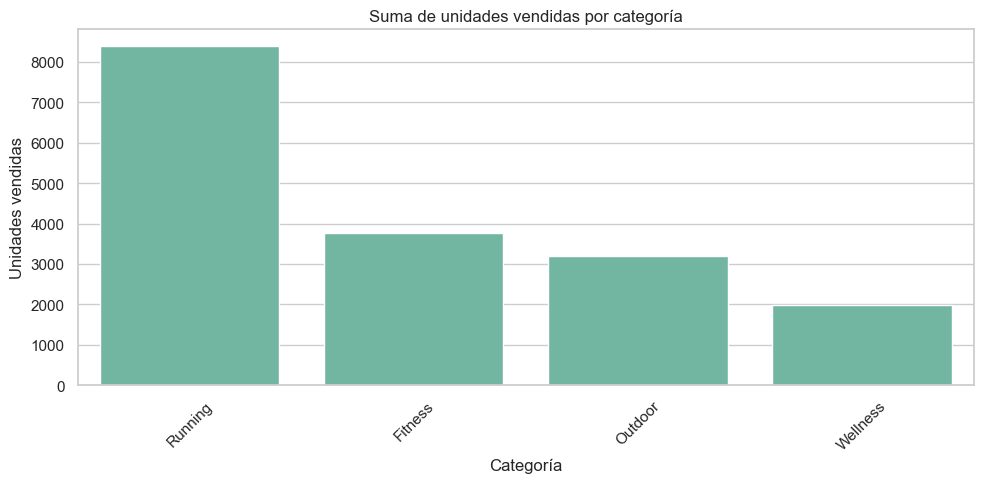

In [26]:
# 🤖 Suma de unidades vendidas por categoría
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator=sum, ci=None, order=df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).index)
plt.title('Suma de unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Suma de unidades vendidas por subcategoría

Gráfico de barras con la suma de unidades vendidas por cada subcategoría de producto.

C:\Users\paula\AppData\Local\Temp\ipykernel_10960\2562296226.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator=sum, ci=None, order=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).index)


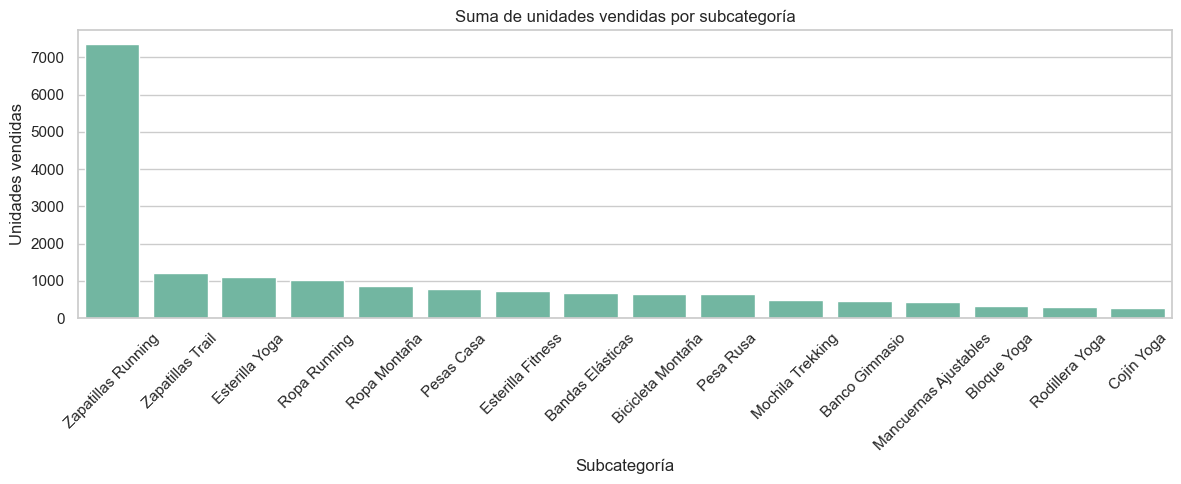

In [27]:
# 🤖 Suma de unidades vendidas por subcategoría
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator=sum, ci=None, order=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).index)
plt.title('Suma de unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Suma de unidades vendidas por top productos

Gráfico de barras con la suma de unidades vendidas para los productos más vendidos.

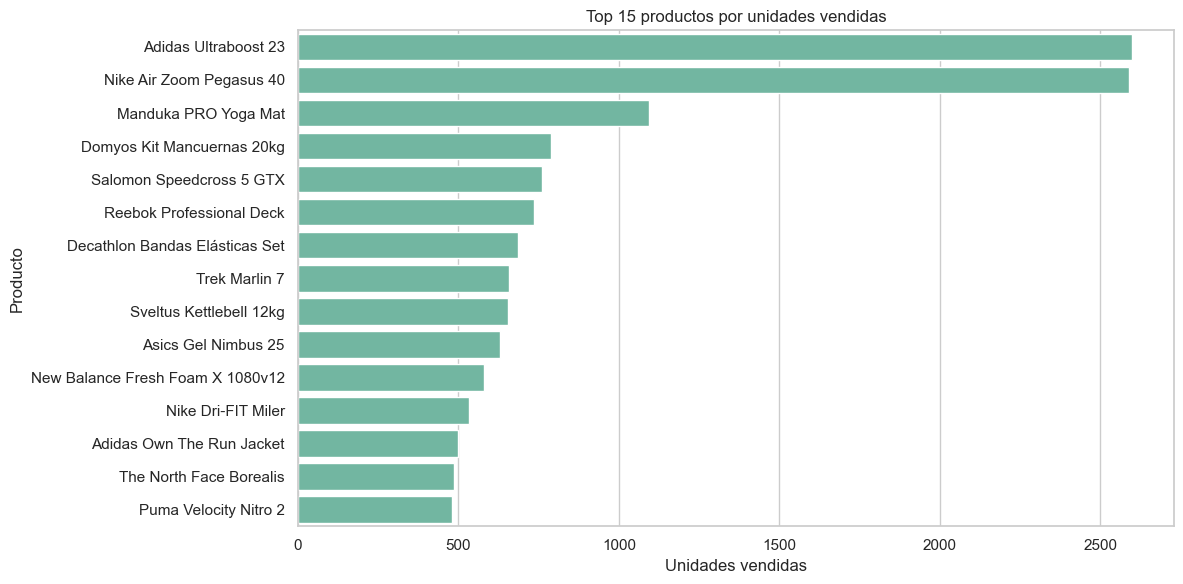

In [28]:
# 🤖 Suma de unidades vendidas por top productos
TOP_N = 15
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(TOP_N)
plt.figure(figsize=(12,6))
sns.barplot(x=top_productos.values, y=top_productos.index, orient='h')
plt.title(f'Top {TOP_N} productos por unidades vendidas')
plt.xlabel('Unidades vendidas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

### 6. Densidad de distribución de precios propios y de Amazon

Gráfico de densidad comparando la distribución de los precios de venta propios y los precios de Amazon como referencia de la competencia.

La columna 'Amazon' no existe en competencia_df. Revisa el nombre exacto de la columna.


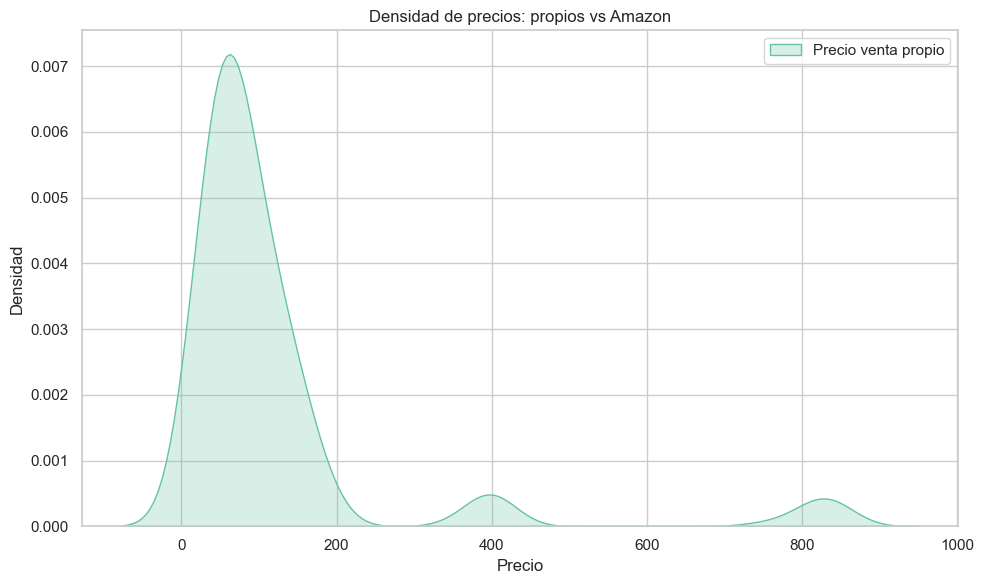

In [29]:
# 🤖 Densidad de distribución de precios propios y de Amazon
# Nos aseguramos de que pandas esté importado antes de usarlo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    df
except NameError:
    try:
        ventas_df
        competencia_df
    except NameError:
        raise Exception("ventas_df y competencia_df deben estar definidos antes de crear df.")
    df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], how='inner')
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Precio venta propio', fill=True)
if 'Amazon' in competencia_df.columns.tolist():
    # Verificamos que la columna 'Amazon' existe y no hay error de mayúsculas/minúsculas
    try:
        precios_amazon = df.merge(competencia_df[['fecha', 'producto_id', 'Amazon']], on=['fecha', 'producto_id'], how='left')['Amazon']
        sns.kdeplot(precios_amazon.dropna(), label='Precio Amazon', fill=True)
    except KeyError:
        print("La columna 'Amazon' no existe en competencia_df. Revisa el nombre exacto de la columna.")
else:
    print("La columna 'Amazon' no está presente en competencia_df.")
plt.title('Densidad de precios: propios vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#ahora le pediremos a la IA que cree las variables temporales y de calendario para españa usando holidays y que nos muestre las primeras filas del dataframe df con las nuevas variables creadas para verificar que se han creado correctamente. Las variables temporales y de calendario son importantes para el análisis de series de tiempo, ya que pueden ayudar a capturar patrones estacionales, tendencias y efectos de días festivos en las ventas. Al utilizar la biblioteca holidays, podemos identificar los días festivos específicos para España y crear variables que indiquen si una fecha es un día festivo o no, lo que puede ser útil para mejorar la precisión de los modelos de forecasting de ventas.

In [32]:
# 🤖 Creación de variables temporales y de calendario para España usando holidays
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta
# Aseguramos que la columna fecha es datetime
df['fecha'] = pd.to_datetime(df['fecha'])
# Variables temporales básicas
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek
df['nombre_dia'] = df['fecha'].dt.day_name()
df['es_fin_semana'] = df['dia_semana'].isin([5,6])
# Festivos en España
festivos_es = holidays.ES(years=df['año'].unique())
df['es_festivo'] = df['fecha'].apply(lambda x: x in festivos_es)
# Black Friday: cuarto viernes de noviembre
def es_black_friday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        primer_dia = fecha.replace(day=1)
        viernes = [primer_dia + timedelta(days=i) for i in range(31) if (primer_dia + timedelta(days=i)).month == 11 and (primer_dia + timedelta(days=i)).weekday() == 4]
        return fecha == viernes[3] if len(viernes) >= 4 else False
    return False
df['es_black_friday'] = df['fecha'].apply(es_black_friday)
# Cyber Monday: primer lunes después de Black Friday
def es_cyber_monday(fecha):
    if fecha.month == 11 and fecha.weekday() == 0:
        año = fecha.year
        nov = pd.date_range(start=f'{año}-11-01', end=f'{año}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        if len(fridays) >= 4:
            bf = fridays[3]
            return fecha == bf + timedelta(days=3)
    return False
df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)
# Variable: semana del año
df['semana_año'] = df['fecha'].dt.isocalendar().week
# Variable: trimestre
df['trimestre'] = df['fecha'].dt.quarter
# Variable: es principio de mes
df['es_principio_mes'] = df['dia_mes'] <= 5
# Variable: es final de mes
df['es_final_mes'] = df['dia_mes'] >= df['fecha'].dt.days_in_month - 4
# Variable: es día laborable
df['es_laborable'] = (~df['es_festivo']) & (~df['es_fin_semana'])
# Variable: es puente (festivo + fin de semana adyacente)
def es_puente(idx):
    es_festivo = df.loc[idx, 'es_festivo']
    es_fin_semana = df.loc[idx, 'es_fin_semana']
    anterior = df['fecha'].shift(1).iloc[idx]
    siguiente = df['fecha'].shift(-1).iloc[idx]
    festivo_anterior = pd.Timestamp(anterior) in [pd.Timestamp(f) for f in festivos_es] if pd.notnull(anterior) else False
    festivo_siguiente = pd.Timestamp(siguiente) in [pd.Timestamp(f) for f in festivos_es] if pd.notnull(siguiente) else False
    return es_festivo and (es_fin_semana or festivo_anterior or festivo_siguiente)
df['es_puente'] = [es_puente(idx) for idx in df.index]
# Variable: días hasta próximo festivo
def dias_hasta_festivo(fecha):
    futuros = [pd.Timestamp(f) for f in festivos_es if pd.Timestamp(f) > pd.Timestamp(fecha)]
    return min([(f - pd.Timestamp(fecha)).days for f in futuros], default=np.nan) if futuros else np.nan
df['dias_hasta_festivo'] = df['fecha'].apply(dias_hasta_festivo)
# Variable: días desde último festivo
def dias_desde_festivo(fecha):
    pasados = [pd.Timestamp(f) for f in festivos_es if pd.Timestamp(f) < pd.Timestamp(fecha)]
    return min([(pd.Timestamp(fecha) - f).days for f in pasados], default=np.nan) if pasados else np.nan
df['dias_desde_festivo'] = df['fecha'].apply(dias_desde_festivo)
# Mostrar las primeras filas para verificar
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_black_friday,es_cyber_monday,semana_año,trimestre,es_principio_mes,es_final_mes,es_laborable,es_puente,dias_hasta_festivo,dias_desde_festivo
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,43,4,False,False,True,False,7,13
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,43,4,False,False,True,False,7,13
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,43,4,False,False,True,False,7,13
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,43,4,False,False,True,False,7,13
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,43,4,False,False,True,False,7,13


In [ ]:
#le pedimos que cree los lags de la variable objetivo unidades_vendidas para los últimos 7 días, y que nos muestre las primeras filas del dataframe df con las nuevas variables creadas para verificar que se han creado correctamente. Los lags son variables que representan los valores anteriores de una serie temporal, y pueden ser útiles para capturar patrones de dependencia temporal en los datos de ventas. Al crear lags para la variable objetivo unidades_vendidas, podemos ayudar a los modelos de forecasting a aprender de las tendencias pasadas y mejorar la precisión de las predicciones futuras.

In [34]:
df.shape

(3524, 38)

In [33]:
# 🤖 Creación de variables de lag y media móvil de 7 días por año
import pandas as pd
import numpy as np
# Creamos los lags de unidades_vendidas del 1 al 7 y la media móvil de 7 días por año
df = df.sort_values(['año', 'fecha'])
for year in df['año'].unique():
    mask = df['año'] == year
    for lag in range(1, 8):
        df.loc[mask, f'unidades_vendidas_lag{lag}'] = df.loc[mask, 'unidades_vendidas'].shift(lag)
    df.loc[mask, 'unidades_vendidas_ma7'] = df.loc[mask, 'unidades_vendidas'].rolling(window=7, min_periods=1).mean()
# Eliminamos registros con nulos en los nuevos lags o media móvil
lag_cols = [f'unidades_vendidas_lag{lag}' for lag in range(1,8)] + ['unidades_vendidas_ma7']
df = df.dropna(subset=lag_cols).reset_index(drop=True)
# Mostramos las primeras filas para verificar
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,dias_hasta_festivo,dias_desde_festivo,unidades_vendidas_lag1,unidades_vendidas_lag2,unidades_vendidas_lag3,unidades_vendidas_lag4,unidades_vendidas_lag5,unidades_vendidas_lag6,unidades_vendidas_lag7,unidades_vendidas_ma7
0,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,...,7,13,2.0,2.0,2.0,2.0,2.0,10.0,6.0,3.142857
1,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,...,7,13,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.000000
2,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,...,7,13,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000
3,2021-10-25,PROD_011,Reebok Professional Deck,Fitness,Esterilla Fitness,45,False,3,44.32,132.96,...,7,13,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.142857
4,2021-10-25,PROD_012,Domyos Kit Mancuernas 20kg,Fitness,Pesas Casa,55,False,3,55.05,165.15,...,7,13,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.285714


In [35]:
df.groupby('año').size()#con esto comprobamos que el número de registros por año es suficiente para tener al menos 7 días de datos y calcular los lags y la media móvil sin perder demasiados registros.

año
2021    881
2022    881
2023    881
2024    881
dtype: int64

In [ ]:
#le pedimos que cree la variable descuento_porcentaje y que nos muestre las primeras filas pra verificar 

In [36]:
# 🤖 Creación de la variable descuento_porcentaje
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100
# Mostramos las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head()

,fecha,producto_id,precio_base,precio_venta,descuento_porcentaje
0,2021-10-25,PROD_008,65,66.60,2.461538
1,2021-10-25,PROD_009,400,392.31,-1.922500
2,2021-10-25,PROD_010,175,174.92,-0.045714
3,2021-10-25,PROD_011,45,44.32,-1.511111
4,2021-10-25,PROD_012,55,55.05,0.090909


In [ ]:
#le pedimos que cree la variable precio_competencia y ratio_precio y que luego elimine las columnas de los competidores 

In [45]:
# 🤖 Creación de variable precio_competencia y ratio_precio, y eliminación de columnas de competidores
# Nos aseguramos de que las columnas de la competencia estén presentes uniendo con competencia_df
if not all(col in df.columns for col in ['Amazon', 'Decathlon', 'Deporvillage']):
    df = df.merge(competencia_df, on=['fecha', 'producto_id'], how='left')

# Calculamos el precio promedio de la competencia (Amazon, Decathlon, Deporvillage)
df['precio_competencia'] = df[['Amazon', 'Decathlon', 'Deporvillage']].mean(axis=1)
# Creamos la variable ratio_precio
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
# Eliminamos las columnas de los competidores
df = df.drop(columns=['Amazon', 'Decathlon', 'Deporvillage'])
# Mostramos las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_venta', 'precio_competencia', 'ratio_precio']].head()

,fecha,producto_id,precio_venta,precio_competencia,ratio_precio
0,2021-10-25,PROD_001,118.36,97.423333,1.214904
1,2021-10-25,PROD_002,136.82,112.250000,1.218886
2,2021-10-25,PROD_003,84.93,79.446667,1.069019
3,2021-10-25,PROD_004,75.42,71.446667,1.055613
4,2021-10-25,PROD_005,35.87,34.793333,1.030945


In [43]:
# 🤖 Creación de variable precio_competencia y ratio_precio, y eliminación de columnas de competidores
# Usamos competencia_df para obtener los precios de la competencia

df = ventas_df.copy()

# Unimos los precios de la competencia al dataframe principal usando 'fecha' y 'producto_id'
df = df.merge(competencia_df, on=['fecha', 'producto_id'], how='left')

# Calculamos el precio promedio de la competencia (Amazon, Decathlon, Deporvillage)
df['precio_competencia'] = df[['Amazon', 'Decathlon', 'Deporvillage']].mean(axis=1)

# Creamos la variable ratio_precio
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']

# Eliminamos las columnas de los competidores
df = df.drop(['Amazon', 'Decathlon', 'Deporvillage'], axis=1)

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail,precio_competencia,ratio_precio
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,False,False,False,False,True,False,97.423333,1.214904
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,False,False,False,False,True,False,112.250000,1.218886
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,False,False,False,False,True,False,79.446667,1.069019
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,False,False,False,False,True,False,71.446667,1.055613
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,False,False,False,True,False,False,34.793333,1.030945


In [46]:
# 🤖 Crear copias de variables y one hot encoding sobre nombre_h, categoria_h y subcategoria_h
# Creamos las nuevas columnas con sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One hot encoding sobre las nuevas columnas
one_hot = pd.get_dummies(df[['nombre_h', 'categoria_h', 'subcategoria_h']])
df = pd.concat([df, one_hot], axis=1)

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,False,False,False,False,False,False,True,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,False,False,False,False,False,False,True,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,False,False,False,False,False,False,True,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,False,False,False,False,False,False,True,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,False,False,False,False,False,True,False,False


In [47]:
# 🤖 Guardar el dataframe df en la carpeta data/processed
df.to_csv('../data/processed/df.csv', index=False)
print('DataFrame guardado en data/processed/df.csv')

DataFrame guardado en data/processed/df.csv


In [ ]:
df.columns#vemos las columnas que tenemos y modificamos el copilot-instruccion para que cree las variables de one hot encoding solo sobre categoria_h y subcategoria_h, y que deje la variable nombre_h sin modificar. Luego, que nos muestre las primeras filas del dataframe df con las nuevas variables creadas para verificar que se han creado correctamente. El one hot encoding es una técnica de preprocesamiento de datos que convierte variables categóricas en variables binarias (0 o 1) para cada categoría. Al aplicar one hot encoding solo sobre las columnas categoria_h y subcategoria_h, podemos preservar la variable nombre_h sin modificarla, lo que puede ser útil si queremos mantener la información original de los nombres de los productos mientras transformamos las categorías en un formato adecuado para el análisis o la construcción de modelos de machine learning.

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos',
       ...
       'subcategoria_h_Esterilla Yoga', 'subcategoria_h_Mancuernas Ajustables',
       'subcategoria_h_Mochila Trekking', 'subcategoria_h_Pesa Rusa',
       'subcategoria_h_Pesas Casa', 'subcategoria_h_Rodillera Yoga',
       'subcategoria_h_Ropa Montaña', 'subcategoria_h_Ropa Running',
       'subcategoria_h_Zapatillas Running', 'subcategoria_h_Zapatillas Trail'],
      dtype='object', length=103)